In [8]:
from glotaran_tools.specification_parser import parse_yml
from glotaran_core.model import Dataset
from glotaran_models.kinetic import KineticSeperableModel
import numpy as np
from lmfit import Parameters
# Imports for plotting

import matplotlib.pyplot as plt
%matplotlib notebook

fitspec = '''
type: kinetic

parameter: {}

compartments: [s1, s2, s3]

megacomplexes:
    - label: mc1
      k_matrices: [k1]

k_matrices:
  - label: "k1"
    matrix: {{
      '("s1","s1")': 1,
      '("s2","s2")': 2,
      '("s3","s3")': 3,
}}

initial_concentrations: []

irf: []

datasets: 
  - label: dataset1
    type: spectral
    megacomplexes: [mc1]
    path: 'data/dataset1.ascii'

'''
   

In [9]:
test_parameter = [101e-4, 202e-5, 505e-6]
test_amps = [1,2,3]
times = np.asarray(np.arange(0, 1500, 1.5))
simparams = Parameters()
simparams.add("p1", 101e-3)
simparams.add("p2",202e-4)
simparams.add("p3",505e-5)

In [10]:
model = parse_yml(fitspec.format(test_parameter))

In [11]:
fitmodel = KineticSeperableModel(model)

[[   50.  5000.   500.]]


<IPython.core.display.Javascript object>


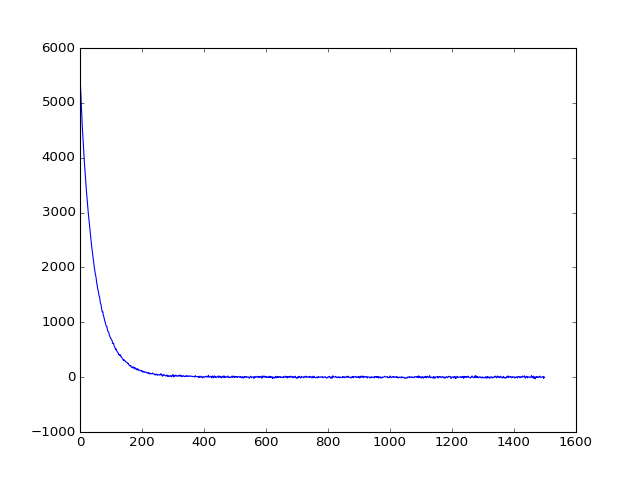

In [19]:
data = fitmodel.eval(simparams, *times, **{'dataset':'dataset1', 
                                           'noise':True, 'noise_std_dev':10,
                                           'amplitudes':[50, 500, 5000]})

fig = plt.figure()
plt.plot(times, data[:, 0])

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5410e+07                                    3.68e+09    
       1              2         4.9991e+05      1.49e+07       1.03e-02       3.72e+08    
       2              3         1.6245e+05      3.37e+05       2.54e-03       3.68e+07    
       3              4         1.3929e+05      2.32e+04       2.46e-03       2.18e+07    
       4              5         1.1586e+05      2.34e+04       4.63e-03       2.60e+07    
       5              6         1.1352e+05      2.35e+03       8.66e-03       1.79e+07    
       6              7         8.4847e+04      2.87e+04       2.16e-03       5.09e+06    
       7              8         8.3489e+04      1.36e+03       4.33e-03       1.20e+07    
       8              9         7.5203e+04      8.29e+03       1.08e-03       2.01e+06    
       9             10         7.2266e+04      2.94e+03       2.16e-03       2.40e+06    

<IPython.core.display.Javascript object>


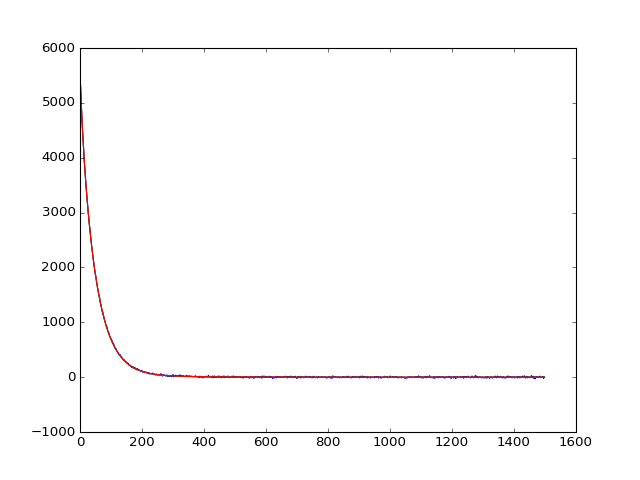

In [21]:
result = fitmodel.fit(fitmodel.get_initial_fitting_parameter(), 
                      *times, 
                      **{"data": data}
                     )
result.best_fit_parameter.pretty_print()
fitted_data = fitmodel.eval(result.best_fit_parameter, *times, **{'dataset':'dataset1','amplitudes':[50, 500, 5000]})
reconstructed_data = result.eval(*times, **{"data": data})
print('Fitted Amplitudes: {}'.format(result.e_matrix(*times, **{"data": data})))

fig = plt.figure()
plt.plot(times, data[:, 0])
plt.plot(times, fitted_data[:, 0])
plt.plot(times, reconstructed_data[:, 0])